In [1]:
import keras
import h5py
import numpy as np
import random
import cv2
from keras_tqdm import TQDMNotebookCallback
from tqdm import tqdm_notebook

infodir = 'C:/Science_Research/xraynet_data/images'
test_path = f'{infodir}/test.h5'
train_path = f'{infodir}/train.h5'
MODEL_NAME = 'xrayNet-keras-inception-resnet-v2' #gve the model a name
# input image dimensions

D:\anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
from matplotlib import pyplot as plt
import h5py

h5f = h5py.File(test_path, 'r')
image = h5f['X'][11]
print(h5f['Y'][11])
plt.imshow(image, cmap='gray')
plt.show()
im = image*255
im = cv2.equalizeHist(im.astype('uint8'))
plt.imshow(im.astype('float32'), cmap='gray')
plt.show()
h5f.close()

[1. 0.]


In [3]:
import h5py

def load_val():
    h5f = h5py.File(test_path, 'r')
    X_val_pre = h5f['X']
    Y_val_pre = h5f['Y']

    X_val = []
    Y_val = []



    for image in tqdm_notebook(X_val_pre):
        im = image*255
        eq = cv2.equalizeHist(im.astype('uint8'))
        im = eq.astype('float32')/255
        X_val.append(cv2.cvtColor(im, cv2.COLOR_GRAY2RGB))

    for label in tqdm_notebook(Y_val_pre):
        Y_val.append(label[0])
        
    h5f.close()
    return X_val, Y_val
    
def load_data_batch(start,stop):
    h5f = h5py.File(train_path, 'r')
    X_train_pre = h5f['X'][start:stop]
    Y_train_pre = h5f['Y'][start:stop]

    X_train = []
    Y_train = []

    for image in tqdm_notebook(X_train_pre):
        im = image*255
        eq = cv2.equalizeHist(im.astype('uint8'))
        im = eq.astype('float32')/255
        X_train.append(cv2.cvtColor(im, cv2.COLOR_GRAY2RGB))

    for label in tqdm_notebook(Y_train_pre):
        Y_train.append(label[0])
        
    h5f.close()        
    return X_train, Y_train


In [ ]:
import os
os.chdir('C:/Science_Research/')

X_val = np.load(f'image_batches/X_val.npy')
Y_val = np.load(f'image_batches/Y_val.npy')
X_train = np.load(f'image_batches/X_train_0.npy')
Y_train = np.load(f'image_batches/Y_train_0.npy')

In [5]:
print(X_train.shape)
print(X_val.shape)

(10000, 256, 256, 3)
(2000, 256, 256, 3)


In [8]:
# Import the InceptionResNetV2 network architecture
from keras.applications.inception_resnet_v2 import *

IMG_WIDTH = 256
IMG_HEIGHT = 256
IMG_DEPTH = 3
BATCH_SIZE = 64


# Instantiate the model with the pre-trained weights (no top)
conv_base = InceptionResNetV2(weights='imagenet',
                  include_top=False, 
                  input_shape=(IMG_HEIGHT, IMG_WIDTH, IMG_DEPTH))

# Show the architecture
conv_base.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 256, 256, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 127, 127, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 127, 127, 32) 96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 127, 127, 32) 0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv2d_2 (

__________________________________________________________________________________________________
mixed_5b (Concatenate)          (None, 29, 29, 320)  0           activation_6[0][0]               
                                                                 activation_8[0][0]               
                                                                 activation_11[0][0]              
                                                                 activation_12[0][0]              
__________________________________________________________________________________________________
conv2d_16 (Conv2D)              (None, 29, 29, 32)   10240       mixed_5b[0][0]                   
__________________________________________________________________________________________________
batch_normalization_16 (BatchNo (None, 29, 29, 32)   96          conv2d_16[0][0]                  
__________________________________________________________________________________________________
activation

__________________________________________________________________________________________________
activation_19 (Activation)      (None, 29, 29, 32)   0           batch_normalization_19[0][0]     
__________________________________________________________________________________________________
activation_21 (Activation)      (None, 29, 29, 32)   0           batch_normalization_21[0][0]     
__________________________________________________________________________________________________
activation_24 (Activation)      (None, 29, 29, 64)   0           batch_normalization_24[0][0]     
__________________________________________________________________________________________________
block35_2_mixed (Concatenate)   (None, 29, 29, 128)  0           activation_19[0][0]              
                                                                 activation_21[0][0]              
                                                                 activation_24[0][0]              
__________

__________________________________________________________________________________________________
conv2d_31 (Conv2D)              (None, 29, 29, 32)   10240       block35_3_ac[0][0]               
__________________________________________________________________________________________________
conv2d_33 (Conv2D)              (None, 29, 29, 32)   9216        activation_32[0][0]              
__________________________________________________________________________________________________
conv2d_36 (Conv2D)              (None, 29, 29, 64)   27648       activation_35[0][0]              
__________________________________________________________________________________________________
batch_normalization_31 (BatchNo (None, 29, 29, 32)   96          conv2d_31[0][0]                  
__________________________________________________________________________________________________
batch_normalization_33 (BatchNo (None, 29, 29, 32)   96          conv2d_33[0][0]                  
__________

__________________________________________________________________________________________________
conv2d_44 (Conv2D)              (None, 29, 29, 32)   10240       block35_5_ac[0][0]               
__________________________________________________________________________________________________
conv2d_47 (Conv2D)              (None, 29, 29, 48)   13824       activation_46[0][0]              
__________________________________________________________________________________________________
batch_normalization_44 (BatchNo (None, 29, 29, 32)   96          conv2d_44[0][0]                  
__________________________________________________________________________________________________
batch_normalization_47 (BatchNo (None, 29, 29, 48)   144         conv2d_47[0][0]                  
__________________________________________________________________________________________________
activation_44 (Activation)      (None, 29, 29, 32)   0           batch_normalization_44[0][0]     
__________

block35_7_conv (Conv2D)         (None, 29, 29, 320)  41280       block35_7_mixed[0][0]            
__________________________________________________________________________________________________
block35_7 (Lambda)              (None, 29, 29, 320)  0           block35_6_ac[0][0]               
                                                                 block35_7_conv[0][0]             
__________________________________________________________________________________________________
block35_7_ac (Activation)       (None, 29, 29, 320)  0           block35_7[0][0]                  
__________________________________________________________________________________________________
conv2d_58 (Conv2D)              (None, 29, 29, 32)   10240       block35_7_ac[0][0]               
__________________________________________________________________________________________________
batch_normalization_58 (BatchNo (None, 29, 29, 32)   96          conv2d_58[0][0]                  
__________

batch_normalization_66 (BatchNo (None, 29, 29, 64)   192         conv2d_66[0][0]                  
__________________________________________________________________________________________________
activation_61 (Activation)      (None, 29, 29, 32)   0           batch_normalization_61[0][0]     
__________________________________________________________________________________________________
activation_63 (Activation)      (None, 29, 29, 32)   0           batch_normalization_63[0][0]     
__________________________________________________________________________________________________
activation_66 (Activation)      (None, 29, 29, 64)   0           batch_normalization_66[0][0]     
__________________________________________________________________________________________________
block35_9_mixed (Concatenate)   (None, 29, 29, 128)  0           activation_61[0][0]              
                                                                 activation_63[0][0]              
          

batch_normalization_73 (BatchNo (None, 14, 14, 384)  1152        conv2d_73[0][0]                  
__________________________________________________________________________________________________
batch_normalization_76 (BatchNo (None, 14, 14, 384)  1152        conv2d_76[0][0]                  
__________________________________________________________________________________________________
activation_73 (Activation)      (None, 14, 14, 384)  0           batch_normalization_73[0][0]     
__________________________________________________________________________________________________
activation_76 (Activation)      (None, 14, 14, 384)  0           batch_normalization_76[0][0]     
__________________________________________________________________________________________________
max_pooling2d_3 (MaxPooling2D)  (None, 14, 14, 320)  0           block35_10_ac[0][0]              
__________________________________________________________________________________________________
mixed_6a (

conv2d_86 (Conv2D)              (None, 14, 14, 128)  139264      block17_2_ac[0][0]               
__________________________________________________________________________________________________
batch_normalization_86 (BatchNo (None, 14, 14, 128)  384         conv2d_86[0][0]                  
__________________________________________________________________________________________________
activation_86 (Activation)      (None, 14, 14, 128)  0           batch_normalization_86[0][0]     
__________________________________________________________________________________________________
conv2d_87 (Conv2D)              (None, 14, 14, 160)  143360      activation_86[0][0]              
__________________________________________________________________________________________________
batch_normalization_87 (BatchNo (None, 14, 14, 160)  480         conv2d_87[0][0]                  
__________________________________________________________________________________________________
activation

conv2d_96 (Conv2D)              (None, 14, 14, 192)  215040      activation_95[0][0]              
__________________________________________________________________________________________________
batch_normalization_93 (BatchNo (None, 14, 14, 192)  576         conv2d_93[0][0]                  
__________________________________________________________________________________________________
batch_normalization_96 (BatchNo (None, 14, 14, 192)  576         conv2d_96[0][0]                  
__________________________________________________________________________________________________
activation_93 (Activation)      (None, 14, 14, 192)  0           batch_normalization_93[0][0]     
__________________________________________________________________________________________________
activation_96 (Activation)      (None, 14, 14, 192)  0           batch_normalization_96[0][0]     
__________________________________________________________________________________________________
block17_5_

__________________________________________________________________________________________________
block17_7 (Lambda)              (None, 14, 14, 1088) 0           block17_6_ac[0][0]               
                                                                 block17_7_conv[0][0]             
__________________________________________________________________________________________________
block17_7_ac (Activation)       (None, 14, 14, 1088) 0           block17_7[0][0]                  
__________________________________________________________________________________________________
conv2d_106 (Conv2D)             (None, 14, 14, 128)  139264      block17_7_ac[0][0]               
__________________________________________________________________________________________________
batch_normalization_106 (BatchN (None, 14, 14, 128)  384         conv2d_106[0][0]                 
__________________________________________________________________________________________________
activation

batch_normalization_115 (BatchN (None, 14, 14, 160)  480         conv2d_115[0][0]                 
__________________________________________________________________________________________________
activation_115 (Activation)     (None, 14, 14, 160)  0           batch_normalization_115[0][0]    
__________________________________________________________________________________________________
conv2d_113 (Conv2D)             (None, 14, 14, 192)  208896      block17_9_ac[0][0]               
__________________________________________________________________________________________________
conv2d_116 (Conv2D)             (None, 14, 14, 192)  215040      activation_115[0][0]             
__________________________________________________________________________________________________
batch_normalization_113 (BatchN (None, 14, 14, 192)  576         conv2d_113[0][0]                 
__________________________________________________________________________________________________
batch_norm

activation_124 (Activation)     (None, 14, 14, 192)  0           batch_normalization_124[0][0]    
__________________________________________________________________________________________________
block17_12_mixed (Concatenate)  (None, 14, 14, 384)  0           activation_121[0][0]             
                                                                 activation_124[0][0]             
__________________________________________________________________________________________________
block17_12_conv (Conv2D)        (None, 14, 14, 1088) 418880      block17_12_mixed[0][0]           
__________________________________________________________________________________________________
block17_12 (Lambda)             (None, 14, 14, 1088) 0           block17_11_ac[0][0]              
                                                                 block17_12_conv[0][0]            
__________________________________________________________________________________________________
block17_12

batch_normalization_134 (BatchN (None, 14, 14, 128)  384         conv2d_134[0][0]                 
__________________________________________________________________________________________________
activation_134 (Activation)     (None, 14, 14, 128)  0           batch_normalization_134[0][0]    
__________________________________________________________________________________________________
conv2d_135 (Conv2D)             (None, 14, 14, 160)  143360      activation_134[0][0]             
__________________________________________________________________________________________________
batch_normalization_135 (BatchN (None, 14, 14, 160)  480         conv2d_135[0][0]                 
__________________________________________________________________________________________________
activation_135 (Activation)     (None, 14, 14, 160)  0           batch_normalization_135[0][0]    
__________________________________________________________________________________________________
conv2d_133

batch_normalization_141 (BatchN (None, 14, 14, 192)  576         conv2d_141[0][0]                 
__________________________________________________________________________________________________
batch_normalization_144 (BatchN (None, 14, 14, 192)  576         conv2d_144[0][0]                 
__________________________________________________________________________________________________
activation_141 (Activation)     (None, 14, 14, 192)  0           batch_normalization_141[0][0]    
__________________________________________________________________________________________________
activation_144 (Activation)     (None, 14, 14, 192)  0           batch_normalization_144[0][0]    
__________________________________________________________________________________________________
block17_17_mixed (Concatenate)  (None, 14, 14, 384)  0           activation_141[0][0]             
                                                                 activation_144[0][0]             
__________

                                                                 block17_19_conv[0][0]            
__________________________________________________________________________________________________
block17_19_ac (Activation)      (None, 14, 14, 1088) 0           block17_19[0][0]                 
__________________________________________________________________________________________________
conv2d_154 (Conv2D)             (None, 14, 14, 128)  139264      block17_19_ac[0][0]              
__________________________________________________________________________________________________
batch_normalization_154 (BatchN (None, 14, 14, 128)  384         conv2d_154[0][0]                 
__________________________________________________________________________________________________
activation_154 (Activation)     (None, 14, 14, 128)  0           batch_normalization_154[0][0]    
__________________________________________________________________________________________________
conv2d_155

mixed_7a (Concatenate)          (None, 6, 6, 2080)   0           activation_158[0][0]             
                                                                 activation_160[0][0]             
                                                                 activation_163[0][0]             
                                                                 max_pooling2d_4[0][0]            
__________________________________________________________________________________________________
conv2d_165 (Conv2D)             (None, 6, 6, 192)    399360      mixed_7a[0][0]                   
__________________________________________________________________________________________________
batch_normalization_165 (BatchN (None, 6, 6, 192)    576         conv2d_165[0][0]                 
__________________________________________________________________________________________________
activation_165 (Activation)     (None, 6, 6, 192)    0           batch_normalization_165[0][0]    
__________

__________________________________________________________________________________________________
activation_174 (Activation)     (None, 6, 6, 224)    0           batch_normalization_174[0][0]    
__________________________________________________________________________________________________
conv2d_172 (Conv2D)             (None, 6, 6, 192)    399360      block8_2_ac[0][0]                
__________________________________________________________________________________________________
conv2d_175 (Conv2D)             (None, 6, 6, 256)    172032      activation_174[0][0]             
__________________________________________________________________________________________________
batch_normalization_172 (BatchN (None, 6, 6, 192)    576         conv2d_172[0][0]                 
__________________________________________________________________________________________________
batch_normalization_175 (BatchN (None, 6, 6, 256)    768         conv2d_175[0][0]                 
__________

__________________________________________________________________________________________________
block8_5_mixed (Concatenate)    (None, 6, 6, 448)    0           activation_180[0][0]             
                                                                 activation_183[0][0]             
__________________________________________________________________________________________________
block8_5_conv (Conv2D)          (None, 6, 6, 2080)   933920      block8_5_mixed[0][0]             
__________________________________________________________________________________________________
block8_5 (Lambda)               (None, 6, 6, 2080)   0           block8_4_ac[0][0]                
                                                                 block8_5_conv[0][0]              
__________________________________________________________________________________________________
block8_5_ac (Activation)        (None, 6, 6, 2080)   0           block8_5[0][0]                   
__________

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.


In [9]:
# Extract features
train_features = conv_base.predict(np.array(X_train), batch_size=BATCH_SIZE, verbose=2)
val_features = conv_base.predict(np.array(X_val), batch_size=BATCH_SIZE, verbose=2)
# Save extracted features
np.savez("train_features", train_features, Y_train)
np.savez("val_features", val_features, Y_val)

NameError: name 'X_train' is not defined

In [19]:
import os
os.chdir('C:/Science_Research/')
train_features, Y_train = np.load("train_features.npz")['arr_0'],np.load("train_features.npz")['arr_1']
val_features, Y_val = np.load("val_features.npz")['arr_0'],np.load("val_features.npz")['arr_1']

In [21]:
print(train_features.shape,"\n", val_features.shape)

(10000, 6, 6, 1536) 
 (2000, 6, 6, 1536)


In [22]:
# Flatten extracted features
train_features_flat = np.reshape(train_features, (10000, 6*6*1536))
val_features_flat = np.reshape(val_features, (2000, 6*6*1536))

In [23]:
print(Y_train.shape, '\n' ,Y_val.shape)

(10000,) 
 (2000,)


In [25]:
from keras import models
from keras import layers
from keras import optimizers
from keras import callbacks
from keras import backend as K

# Define the densely connected classifier
NB_TRAIN_SAMPLES = train_features_flat.shape[0]
NB_VALIDATION_SAMPLES = val_features_flat.shape[0]
NB_EPOCHS = 50

model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_dim=(6*6*1536)))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='relu'))
#model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))

model.add(layers.Dense(1, activation='sigmoid'))

model.compile(
    loss='binary_crossentropy',
    optimizer=optimizers.RMSprop(lr=2e-6),
    metrics=['acc'])

reduce_learning = callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=2,
    verbose=1,
    mode='auto',
    epsilon=0.0001,
    cooldown=2,
    min_lr=0)

eary_stopping = callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=7,
    verbose=1,
    mode='auto')

callbacks = [TQDMNotebookCallback() ,eary_stopping, reduce_learning]

In [26]:
# Train the the model
history = model.fit(
    train_features_flat,
    Y_train,
    batch_size=64,
    epochs=NB_EPOCHS,
    validation_data=(val_features_flat, Y_val),
    verbose = 2,
    callbacks=callbacks
)

Train on 10000 samples, validate on 2000 samples


Epoch 1/50
 - 7s - loss: 0.7744 - acc: 0.5442 - val_loss: 0.6513 - val_acc: 0.6175


Epoch 2/50
 - 5s - loss: 0.6977 - acc: 0.5785 - val_loss: 0.6451 - val_acc: 0.6285


Epoch 3/50
 - 5s - loss: 0.6721 - acc: 0.6024 - val_loss: 0.6390 - val_acc: 0.6335


Epoch 4/50
 - 5s - loss: 0.6645 - acc: 0.6164 - val_loss: 0.6314 - val_acc: 0.6440


Epoch 5/50
 - 5s - loss: 0.6521 - acc: 0.6255 - val_loss: 0.6308 - val_acc: 0.6505


Epoch 6/50
 - 5s - loss: 0.6450 - acc: 0.6339 - val_loss: 0.6265 - val_acc: 0.6565


Epoch 7/50
 - 5s - loss: 0.6407 - acc: 0.6476 - val_loss: 0.6229 - val_acc: 0.6625


Epoch 8/50
 - 5s - loss: 0.6306 - acc: 0.6499 - val_loss: 0.6218 - val_acc: 0.6590


Epoch 9/50
 - 5s - loss: 0.6236 - acc: 0.6571 - val_loss: 0.6206 - val_acc: 0.6645


Epoch 10/50
 - 5s - loss: 0.6175 - acc: 0.6668 - val_loss: 0.6172 - val_acc: 0.6780


Epoch 11/50
 - 5s - loss: 0.6101 - acc: 0.6713 - val_loss: 0.6163 - val_acc: 0.6695


Epoch 12/50
 - 5s - loss: 0.6088 - acc: 0.6771 - val_loss: 0.6141 - val_acc: 0.6695


Epoch 13/50
 - 5s - loss: 0.6026 - acc: 0.6790 - val_loss: 0.6154 - val_acc: 0.6705


Epoch 14/50
 - 5s - loss: 0.5928 - acc: 0.6904 - val_loss: 0.6115 - val_acc: 0.6695


Epoch 15/50
 - 5s - loss: 0.5938 - acc: 0.6853 - val_loss: 0.6103 - val_acc: 0.6800


Epoch 16/50
 - 5s - loss: 0.5829 - acc: 0.6890 - val_loss: 0.6215 - val_acc: 0.6690


Epoch 17/50
 - 5s - loss: 0.5803 - acc: 0.6996 - val_loss: 0.6159 - val_acc: 0.6660


Epoch 18/50
 - 5s - loss: 0.5770 - acc: 0.7065 - val_loss: 0.6084 - val_acc: 0.6780


Epoch 19/50
 - 5s - loss: 0.5696 - acc: 0.7068 - val_loss: 0.6102 - val_acc: 0.6650


Epoch 20/50
 - 5s - loss: 0.5618 - acc: 0.7144 - val_loss: 0.6069 - val_acc: 0.6775


Epoch 21/50
 - 5s - loss: 0.5565 - acc: 0.7177 - val_loss: 0.6066 - val_acc: 0.6820


Epoch 22/50
 - 5s - loss: 0.5517 - acc: 0.7265 - val_loss: 0.6209 - val_acc: 0.6690


Epoch 23/50
 - 5s - loss: 0.5473 - acc: 0.7268 - val_loss: 0.6096 - val_acc: 0.6715


Epoch 24/50
 - 5s - loss: 0.5358 - acc: 0.7358 - val_loss: 0.6045 - val_acc: 0.6815


Epoch 25/50
 - 5s - loss: 0.5337 - acc: 0.7346 - val_loss: 0.6133 - val_acc: 0.6805


Epoch 26/50
 - 5s - loss: 0.5301 - acc: 0.7389 - val_loss: 0.6069 - val_acc: 0.6770


Epoch 27/50

Epoch 00027: ReduceLROnPlateau reducing learning rate to 3.999999989900971e-07.
 - 6s - loss: 0.5227 - acc: 0.7474 - val_loss: 0.6050 - val_acc: 0.6730


Epoch 28/50
 - 5s - loss: 0.5053 - acc: 0.7568 - val_loss: 0.6058 - val_acc: 0.6750


Epoch 29/50
 - 5s - loss: 0.5036 - acc: 0.7574 - val_loss: 0.6056 - val_acc: 0.6720


Epoch 30/50
 - 5s - loss: 0.5033 - acc: 0.7606 - val_loss: 0.6045 - val_acc: 0.6735


Epoch 31/50

Epoch 00031: ReduceLROnPlateau reducing learning rate to 8.00000009348878e-08.
 - 5s - loss: 0.5014 - acc: 0.7638 - val_loss: 0.6048 - val_acc: 0.6735


Epoch 32/50
 - 5s - loss: 0.4963 - acc: 0.7620 - val_loss: 0.6043 - val_acc: 0.6765


Epoch 33/50
 - 5s - loss: 0.4963 - acc: 0.7668 - val_loss: 0.6042 - val_acc: 0.6745


Epoch 34/50
 - 5s - loss: 0.4961 - acc: 0.7620 - val_loss: 0.6044 - val_acc: 0.6765


Epoch 35/50

Epoch 00035: ReduceLROnPlateau reducing learning rate to 1.5999999902760466e-08.
 - 5s - loss: 0.4957 - acc: 0.7686 - val_loss: 0.6046 - val_acc: 0.6765


Epoch 36/50
 - 5s - loss: 0.4968 - acc: 0.7677 - val_loss: 0.6044 - val_acc: 0.6765


Epoch 37/50
 - 5s - loss: 0.4985 - acc: 0.7598 - val_loss: 0.6043 - val_acc: 0.6775


Epoch 38/50
 - 5s - loss: 0.4931 - acc: 0.7714 - val_loss: 0.6042 - val_acc: 0.6775


Epoch 39/50

Epoch 00039: ReduceLROnPlateau reducing learning rate to 3.1999999094978194e-09.
 - 5s - loss: 0.4997 - acc: 0.7604 - val_loss: 0.6042 - val_acc: 0.6775


Epoch 40/50
 - 5s - loss: 0.5007 - acc: 0.7645 - val_loss: 0.6042 - val_acc: 0.6775


Epoch 41/50
 - 5s - loss: 0.4989 - acc: 0.7639 - val_loss: 0.6042 - val_acc: 0.6780


Epoch 42/50
 - 5s - loss: 0.4987 - acc: 0.7623 - val_loss: 0.6042 - val_acc: 0.6780


Epoch 43/50
 - 5s - loss: 0.4961 - acc: 0.7607 - val_loss: 0.6042 - val_acc: 0.6780


Epoch 44/50
 - 5s - loss: 0.4946 - acc: 0.7675 - val_loss: 0.6042 - val_acc: 0.6780


Epoch 45/50
 - 5s - loss: 0.4962 - acc: 0.7627 - val_loss: 0.6042 - val_acc: 0.6780


Epoch 46/50

Epoch 00046: ReduceLROnPlateau reducing learning rate to 6.399999641359955e-10.
 - 5s - loss: 0.4969 - acc: 0.7642 - val_loss: 0.6042 - val_acc: 0.6775


Epoch 47/50
 - 5s - loss: 0.4932 - acc: 0.7668 - val_loss: 0.6042 - val_acc: 0.6775


Epoch 48/50
 - 5s - loss: 0.4951 - acc: 0.7668 - val_loss: 0.6042 - val_acc: 0.6775


Epoch 49/50
 - 5s - loss: 0.4964 - acc: 0.7634 - val_loss: 0.6042 - val_acc: 0.6775


Epoch 50/50

Epoch 00050: ReduceLROnPlateau reducing learning rate to 1.27999988386307e-10.
 - 5s - loss: 0.4903 - acc: 0.7688 - val_loss: 0.6042 - val_acc: 0.6775



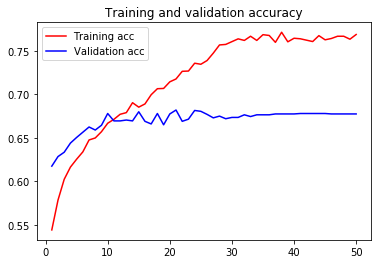

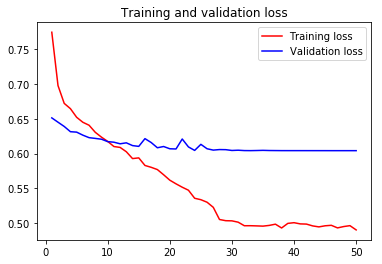

In [27]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.title('Training and validation accuracy')
plt.plot(epochs, acc, 'red', label='Training acc')
plt.plot(epochs, val_acc, 'blue', label='Validation acc')
plt.legend()

plt.figure()
plt.title('Training and validation loss')
plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')

plt.legend()

plt.show()

In [ ]:
max(val_acc)

### [0, 1] == Normal == 0

### [1, 0] == Abnormal == 1

### [Abnormalness, Normalness]